#**Temperature Forecast Project using ML**
---

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Importing Modules

In [44]:
# Importing necessary libraries

# For dealing with Dataframe
import pandas as pd
# For Dealing with Calculations
import numpy as np
# For dealing with Graphs
import matplotlib.pyplot as plt
import seaborn as sns
# For Machine Learning Related task
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#**Load the Data**

In [45]:
# Read the excel file
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#**Explore the Data**

In [46]:
# let look the top 5 rows of dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [47]:
# Check the Shape of Dataset >>
print(">> Rows Of Dataset >> ",df.shape[0])
print(">> Columns Of Dataset >> ",df.shape[1])

>> Rows Of Dataset >>  7752
>> Columns Of Dataset >>  25


#**Dataset Attributes**
---

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [48]:
# Lets Check dataset information >>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [49]:
# Let's check the null values >>
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [50]:
# >> We can see some null values we can drop them as we have large amount of dataset, so it will not affect too much >>
df.dropna(inplace=True)

In [51]:
# Let's check for duplicates columns >>
df.duplicated().sum()

# >> We can see no duplicates Values >>

0

In [52]:
# >> Let's check the datatype of our attributes >> All are flaot's only we need to  process date >>
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

#**EDA**

<Axes: xlabel='Present_Tmax', ylabel='Count'>

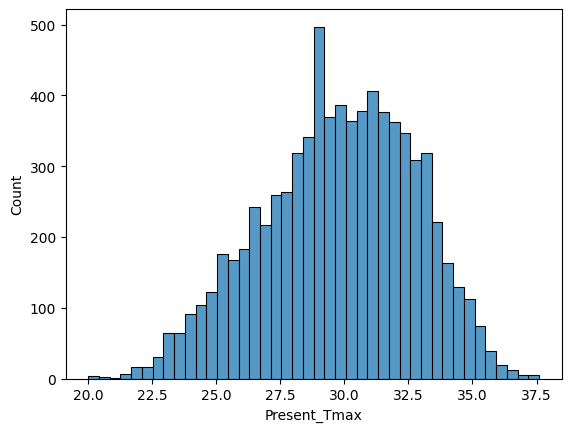

In [53]:
# >> We can see distribution of Present Max Temperature is in normal distribution >>
sns.histplot(df['Present_Tmax'])

<Axes: xlabel='Present_Tmin', ylabel='Count'>

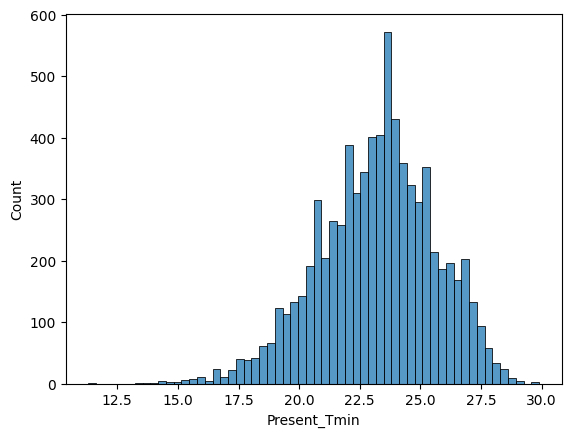

In [54]:
# >> We can see distribution of Present Min Temperature is in normal distribution >>
sns.histplot(df['Present_Tmin'])

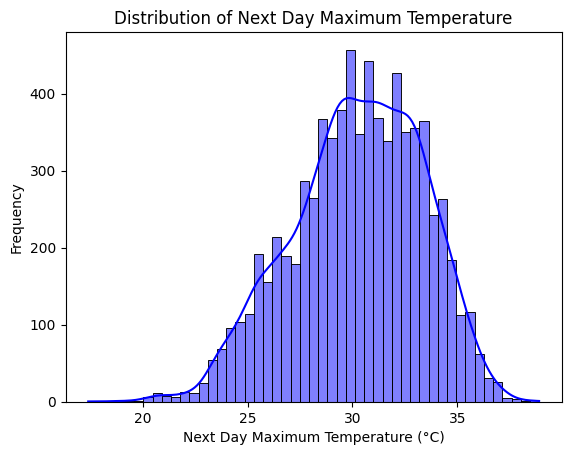

In [55]:
sns.histplot(df['Next_Tmax'], color='blue', kde=True)
plt.title('Distribution of Next Day Maximum Temperature')
plt.xlabel('Next Day Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# >> We can see distribution for Max Temp is between 20-35 with Normal distribution >>

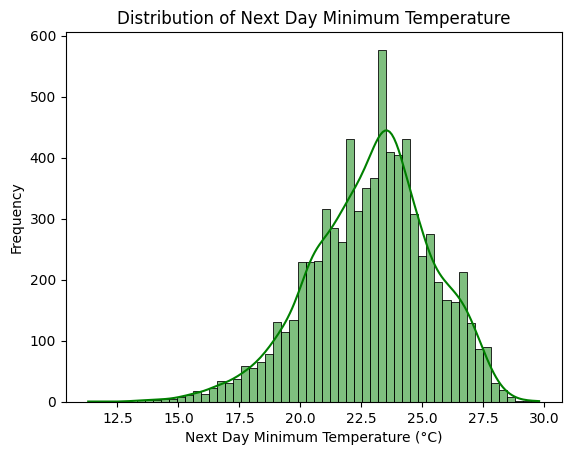

In [56]:
sns.histplot(df['Next_Tmin'], color='green', kde=True)
plt.title('Distribution of Next Day Minimum Temperature')
plt.xlabel('Next Day Minimum Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# >> We can see distribution for Min Temp is between 12-27 with Normal distribution >>

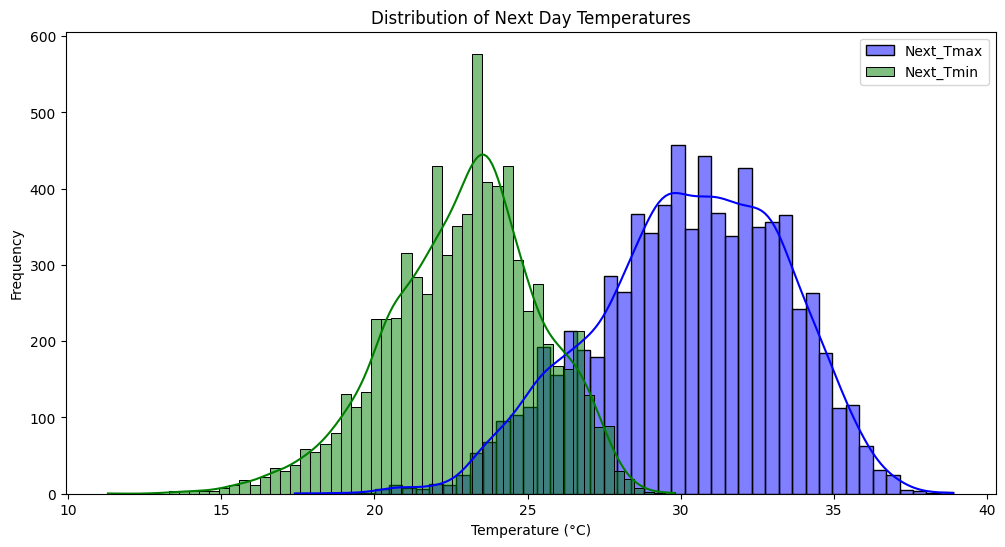

In [71]:
# Target Variable Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Next_Tmax'], kde=True, color='blue', label='Next_Tmax')
sns.histplot(df['Next_Tmin'], kde=True, color='green', label='Next_Tmin')
plt.title('Distribution of Next Day Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-57-e3ef42089c4b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


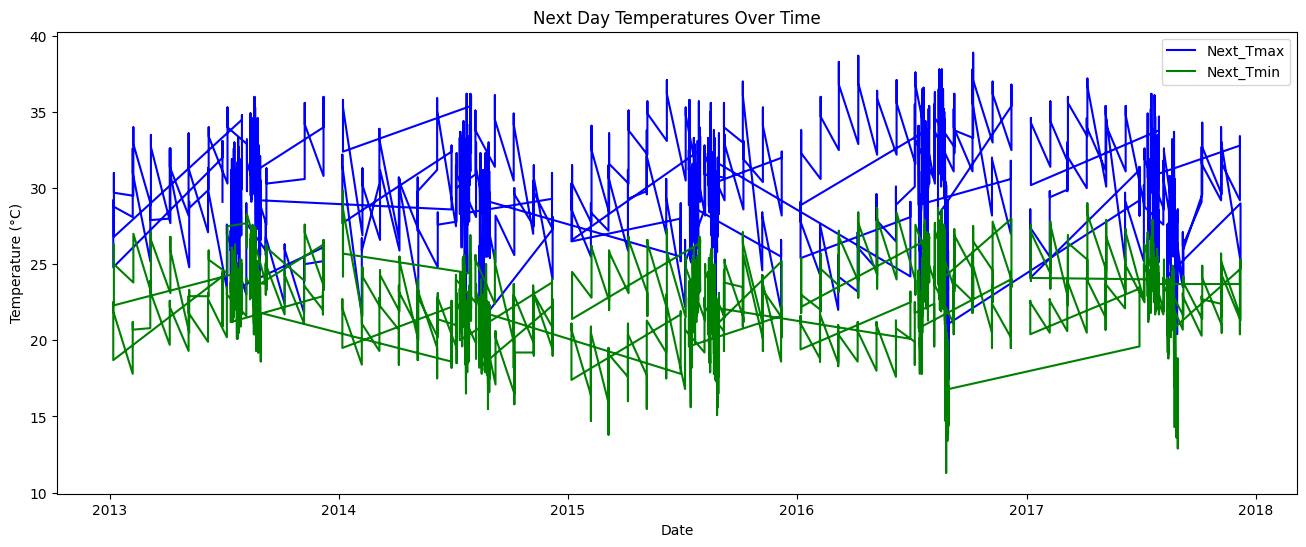

In [57]:
# Temporal Analysis >>

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Next_Tmax'], label='Next_Tmax', color='blue')
plt.plot(df['Date'], df['Next_Tmin'], label='Next_Tmin', color='green')
plt.title('Next Day Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# >> In year 2017 & 2018 we can see sudden temperature drop in min Temp as compared to other years >>

   - Both temperature lines exhibit fluctuations over time.
   - There is no clear upward or downward trend; instead, temperatures consistently vary within a certain range.
   - The blue line (maximum temperature) and green line (minimum temperature) follow similar patterns.
   - The data points show daily temperature variations, likely influenced by seasonal changes.
   - The graph provides insight into the daily temperature fluctuations over several years, but it does not reveal any long-term trends.

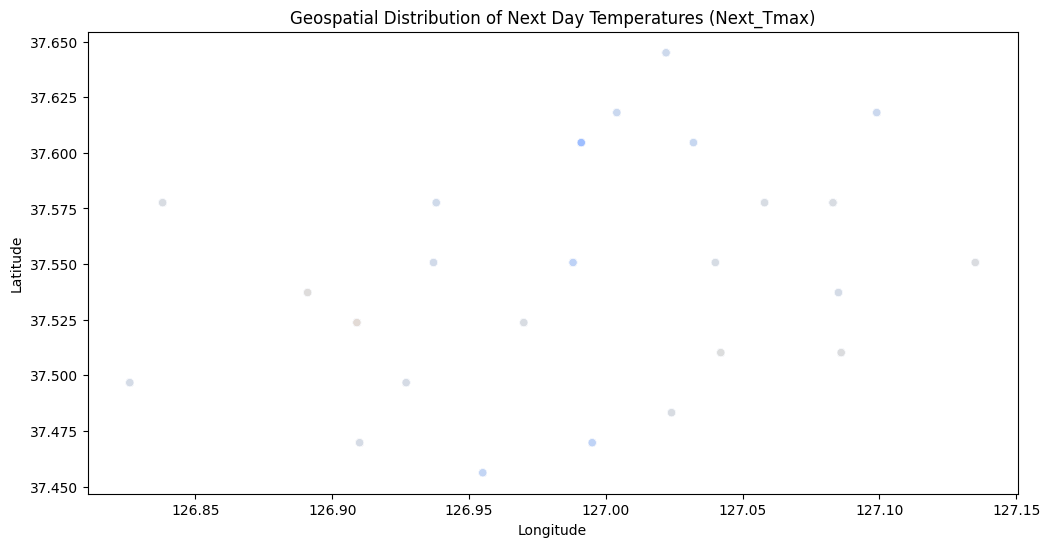

In [58]:
# Geospatial Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lon', y='lat', hue='Next_Tmax', data=df, palette='coolwarm', legend=False)
plt.title('Geospatial Distribution of Next Day Temperatures (Next_Tmax)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

   - The scatter plot reveals temperature variations across different geographical coordinates.
   - The distribution of data points suggests that temperatures vary significantly based on location.
   - We can infer that certain areas experience higher or lower temperatures, but without additional context, we cannot identify specific patterns or trends.



<ipython-input-59-e157088b82fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


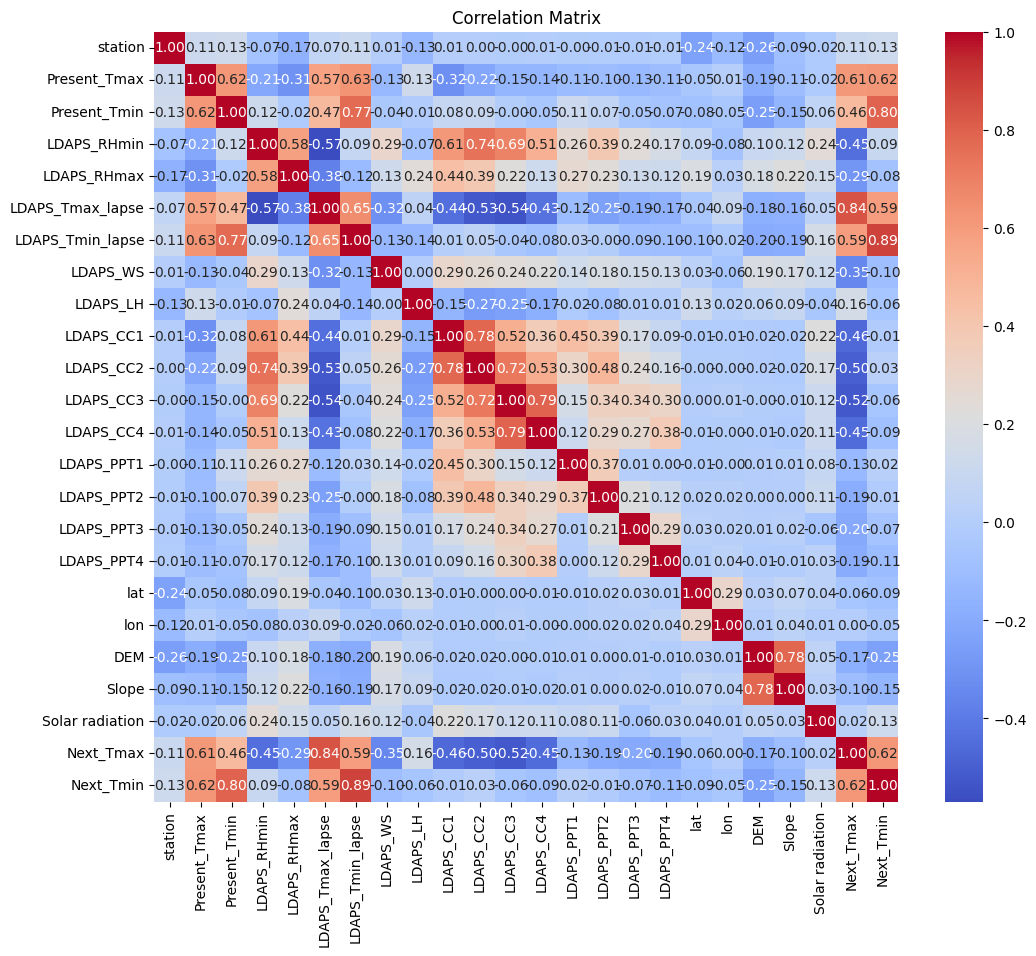

In [59]:
# Examining correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#**Data Splitting**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into features and target variables
X = df.drop(['Next_Tmax', 'Next_Tmin', 'Date'], axis=1)  # Features
y_max = df['Next_Tmax']  # Target variable for maximum temperature
y_min = df['Next_Tmin']  # Target variable for minimum temperature

In [61]:
# Splitting the data into training and testing sets
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

#**Feature Scaling**

In [ ]:
# Feature scaling
scaler = StandardScaler()

# Scale down the values using Standard Scalar
X_train_max_scaled = scaler.fit_transform(X_train_max)
X_test_max_scaled = scaler.transform(X_test_max)

X_train_min_scaled = scaler.fit_transform(X_train_min)
X_test_min_scaled = scaler.transform(X_test_min)

#**Model Building**

In [62]:
# For predicting maximum temperature (Next_Tmax)
max_temp_model = RandomForestRegressor(random_state=42)
max_temp_model.fit(X_train_max_scaled, y_train_max)

RandomForestRegressor(random_state=42)

In [63]:
# For predicting minimum temperature (Next_Tmin)
min_temp_model = RandomForestRegressor(random_state=42)
min_temp_model.fit(X_train_min_scaled, y_train_min)

RandomForestRegressor(random_state=42)

#**Model Evaluation**

In [64]:
# Evaluate the models
max_temp_predictions = max_temp_model.predict(X_test_max_scaled)
min_temp_predictions = min_temp_model.predict(X_test_min_scaled)

In [65]:
max_temp_rmse = mean_squared_error(y_test_max, max_temp_predictions, squared=False)
min_temp_rmse = mean_squared_error(y_test_min, min_temp_predictions, squared=False)

In [66]:
print("RMSE for Maximum Temperature Prediction:", max_temp_rmse)
print("RMSE for Minimum Temperature Prediction:", min_temp_rmse)

RMSE for Maximum Temperature Prediction: 1.0041100566814638
RMSE for Minimum Temperature Prediction: 0.788945882846603


In [67]:
r2_score(y_test_max,max_temp_predictions)

0.8929396724710941

In [68]:
r2_score(y_test_min,min_temp_predictions)

0.8986786511588675

#**Feature Importance**

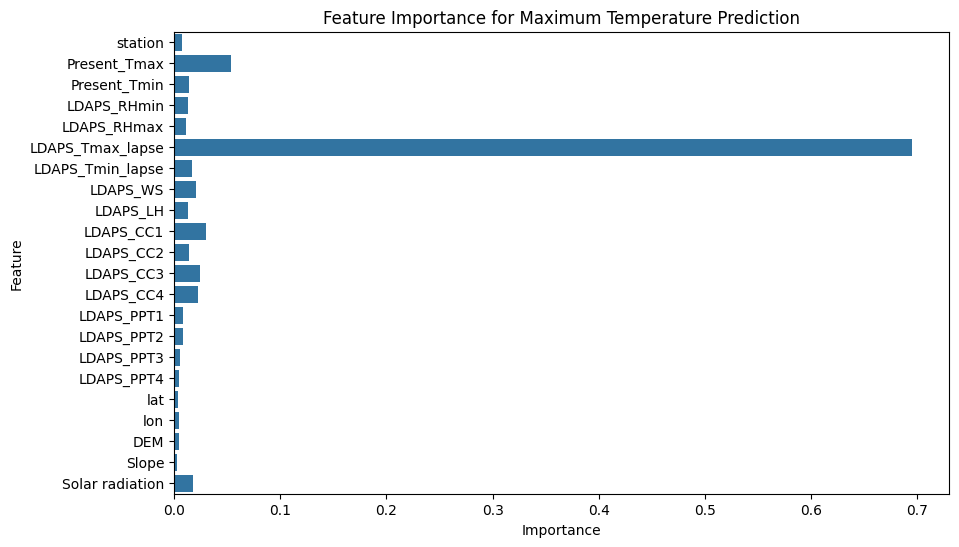

In [69]:
plt.figure(figsize=(10, 6))
feature_importance_max = max_temp_model.feature_importances_
sns.barplot(x=feature_importance_max, y=X.columns, orient='h')
plt.title('Feature Importance for Maximum Temperature Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# >>> Present_Tmax & LDAPS_Tmax_lapse are the important features for prediction of next day max temperature

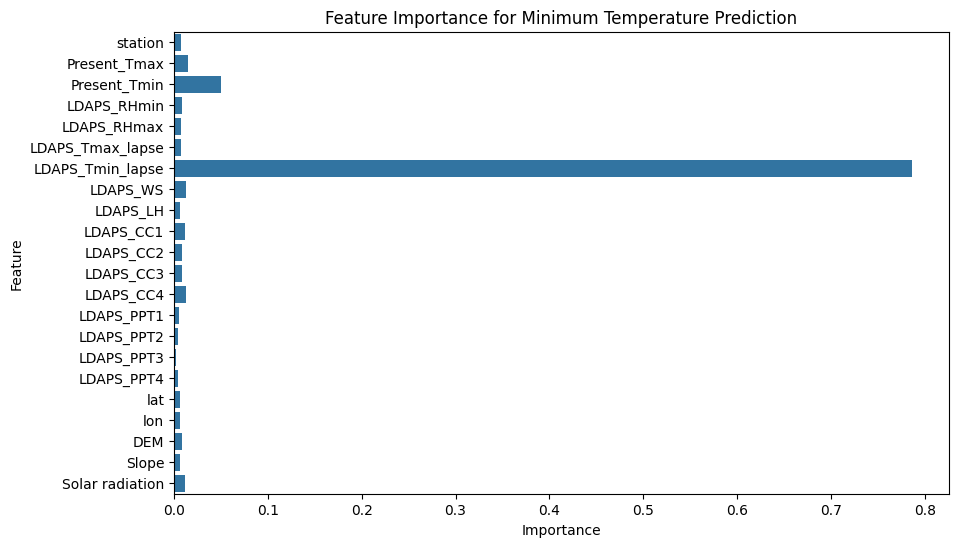

In [70]:
plt.figure(figsize=(10, 6))
feature_importance_min = min_temp_model.feature_importances_
sns.barplot(x=feature_importance_min, y=X.columns, orient='h')
plt.title('Feature Importance for Minimum Temperature Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# >>> Present_Tmin & LDAPS_Tmin_lapse are the important features for prediction of next day min temperature